In [ ]:
# Step 1: Data Preprocessing + Exploratory Data Analysis (EDA)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# ---------------------------
# 1. Load Dataset
# ---------------------------

df = pd.read_csv("fraudTrain.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Dataset loaded successfully!
Shape: (1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
# Drop 'Unnamed: 0' (unnecessary) column
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("🧹 Removed 'Unnamed: 0' column.")


🧹 Removed 'Unnamed: 0' column.



🔍 Checking for null values:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

🎯 Target class distribution:
is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


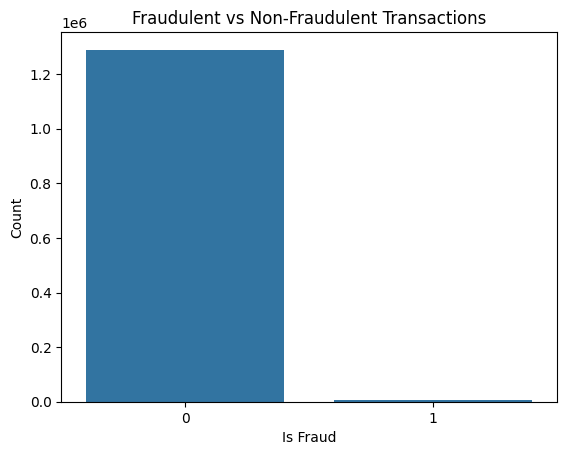

In [ ]:
# ---------------------------
# 2. Initial Checks
# ---------------------------

print("\n🔍 Checking for null values:")
print(df.isnull().sum())

print("\n🎯 Target class distribution:")
print(df['is_fraud'].value_counts(normalize=True) * 100)

sns.countplot(data=df, x='is_fraud')
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

In [ ]:
# ---------------------------
# 3. Feature Engineering
# ---------------------------

# Convert datetime if exists
if 'trans_date_trans_time' in df.columns:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
    df['month'] = df['trans_date_trans_time'].dt.month

# Drop high-cardinality or identifier columns (if any)
drop_cols = ['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'unix_time']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

# Label Encoding for categorical features
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# ---------------------------
# 4. Scaling Numerical Features
# ---------------------------

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col != 'is_fraud']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\n📦 Encoded and scaled features:")
df.head()


📦 Encoded and scaled features:


,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,hour,day_of_week,month
0,0.851654,0.452853,-0.407826,-0.909206,0.312207,0.022519,-0.749136,-0.484420,0.657620,-0.282589,0.848099,0.915085,-1.581274,-0.494354,0.593864,0,0,1,1
1,-0.506880,-0.569266,0.230039,-0.909206,0.644767,1.418098,1.872567,2.039120,-2.033870,-0.293670,1.262061,0.272047,-1.306222,2.078699,-2.030341,0,0,1,1
2,0.234591,-1.591384,0.934149,1.099861,0.087922,-0.954386,1.281042,0.717754,-1.601537,-0.280406,0.398450,-0.868225,0.455137,0.902849,-1.592323,0,0,1,1
3,0.085302,-1.080325,-0.158132,1.099861,-1.396996,-0.047260,0.402753,1.515617,-1.590766,-0.287742,0.548333,-0.513059,-0.277203,1.662886,-1.621848,0,0,1,1
4,-0.228206,0.708382,-0.177094,1.099861,-0.886556,1.278540,-0.906090,-0.023035,0.782279,-0.293835,-0.964771,0.746848,0.488286,0.026941,0.841909,0,0,1,1


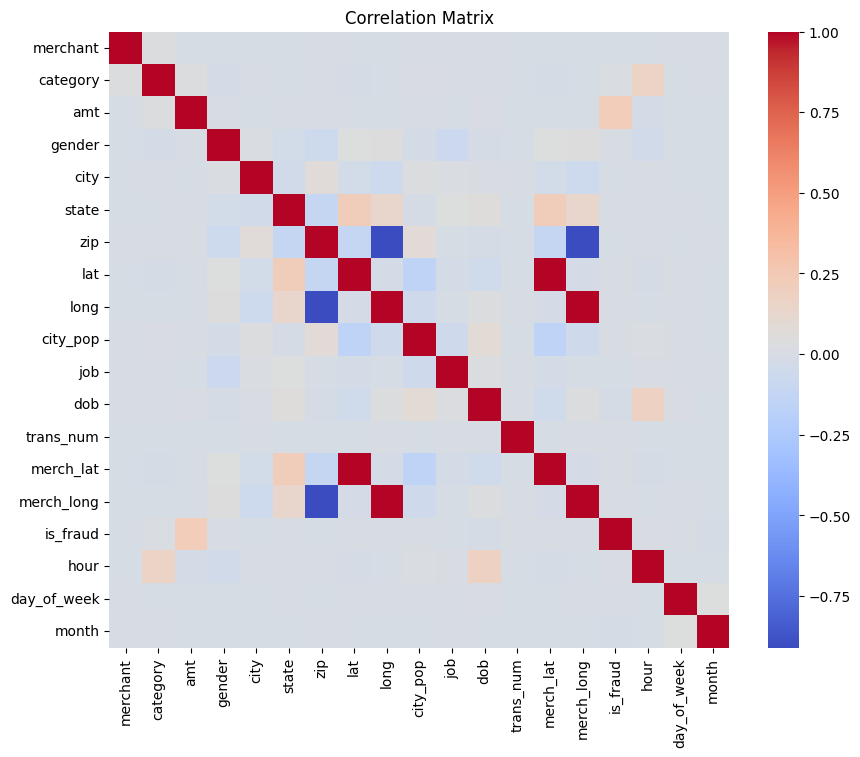

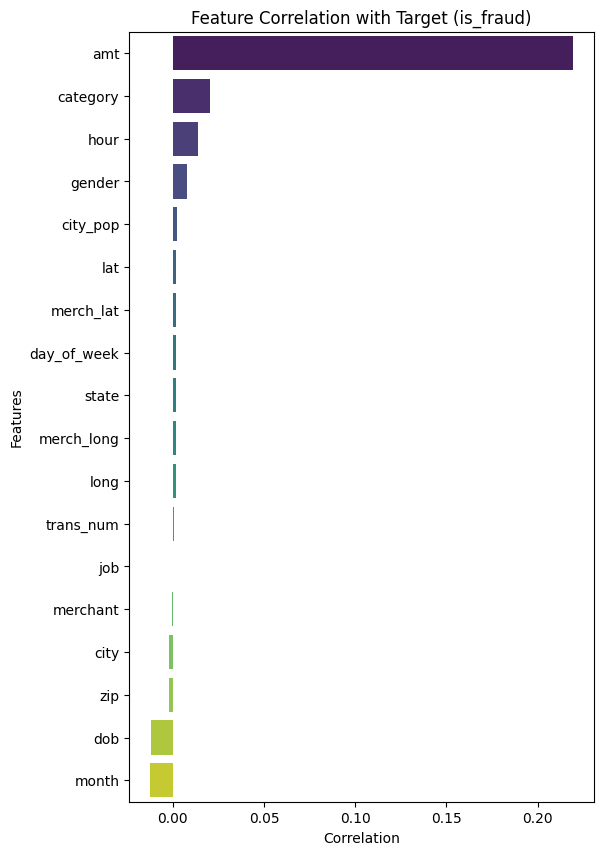

In [ ]:
# ---------------------------
# 5. Correlation Heatmap
# ---------------------------

plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

# Correlation with Target
plt.figure(figsize=(6, 10))
target_corr = corr['is_fraud'].sort_values(ascending=False).drop('is_fraud')
sns.barplot(y=target_corr.index, x=target_corr.values, palette='viridis')
plt.title("Feature Correlation with Target (is_fraud)")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

In [ ]:
# ---------------------------
# 6. Save Preprocessed Dataset
# ---------------------------

df.to_csv("processed_fraudTest.csv", index=False)
print("\n✅ Preprocessing complete. File saved as 'processed_fraudTest.csv'.")


✅ Preprocessing complete. File saved as 'processed_fraudTest.csv'.


In [ ]:
# Step 2: Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers

In [ ]:
# ---------------------------
# 1. Load Preprocessed Data
# ---------------------------
df = pd.read_csv("processed_fraudTest.csv")

X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

In [ ]:
# ---------------------------
# 2. Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Oversampling for class imbalance
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("✅ Applied SMOTE. Class distribution after resampling:")
print(pd.Series(y_train_res).value_counts())


✅ Applied SMOTE. Class distribution after resampling:
is_fraud
0    1031335
1    1031335
Name: count, dtype: int64


In [ ]:
# ---------------------------
# 3. Isolation Forest
# ---------------------------
iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(X_train)

iso_preds = iso.predict(X_test)
iso_preds = np.where(iso_preds == -1, 1, 0)  # -1 is anomaly

print("🔍 Isolation Forest Results:")
print(confusion_matrix(y_test, iso_preds))
print(classification_report(y_test, iso_preds))

🔍 Isolation Forest Results:
[[255394   2440]
 [  1408     93]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    257834
           1       0.04      0.06      0.05      1501

    accuracy                           0.99    259335
   macro avg       0.52      0.53      0.52    259335
weighted avg       0.99      0.99      0.99    259335



In [ ]:
# ---------------------------
# 4. Autoencoder
# ---------------------------
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.1, verbose=1)

# Compute reconstruction error
X_test_recon = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_recon, 2), axis=1)

threshold = np.percentile(mse, 95)  # Top 5% = fraud
auto_preds = (mse > threshold).astype(int)

print("\n🔍 Autoencoder Results:")
print(confusion_matrix(y_test, auto_preds))
print(classification_report(y_test, auto_preds))

Epoch 1/10
14588/14588 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 13.6588 - val_loss: 13.4960
Epoch 2/10
14588/14588 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 13.4992 - val_loss: 13.4807
Epoch 3/10
14588/14588 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 13.4750 - val_loss: 13.4754
Epoch 4/10
14588/14588 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 13.4640 - val_loss: 13.4716
Epoch 5/10
14588/14588 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 13.4569 - val_loss: 13.4688
Epoch 6/10
14588/14588 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 13.4534 - val_loss: 13.4669
Epoch 7/10
14588/14588 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 13.4431 - val_loss: 13.4657
Epoch 8/10
14588/14588 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 13.4427 - val_loss: 13.4647
Epoch 9/10
14588/14588 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 13.4471 - val_loss: 13.4642
Epoch 10/10
14588/14588 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 13.4643 - val_loss: 13.4641
8105/8105 ━━━━━━━━━━━━━━━━━━━━ 8s 945us/step

🔍 Autoencoder Results:


In [ ]:
# ---------------------------
# 5. Random Forest Classifier (Supervised)
# ---------------------------
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_train_res, y_train_res)
rf_preds = clf.predict(X_test)

print("\n🔍 Random Forest Results:")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


🔍 Random Forest Results:
[[257670    164]
 [   281   1220]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.88      0.81      0.85      1501

    accuracy                           1.00    259335
   macro avg       0.94      0.91      0.92    259335
weighted avg       1.00      1.00      1.00    259335



In [ ]:
# ---------------------------
# 6. Ensemble Voting (Majority Voting)
# ---------------------------
from scipy.stats import mode

# Transpose the predictions matrix so each row is a model, each column is a sample
ensemble_preds = np.array([iso_preds, auto_preds, rf_preds])

# Majority vote across axis=0 (i.e., each column → sample-wise)
voted_preds = mode(ensemble_preds, axis=0).mode.squeeze()

print("\n✅ Ensemble Voting Results:")
print(confusion_matrix(y_test, voted_preds))
print(classification_report(y_test, voted_preds))


✅ Ensemble Voting Results:
[[257469    365]
 [  1150    351]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.49      0.23      0.32      1501

    accuracy                           0.99    259335
   macro avg       0.74      0.62      0.66    259335
weighted avg       0.99      0.99      0.99    259335



In [ ]:
# Step 3:

import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# ---------------------------
# 1. Load preprocessed data
# ---------------------------
df = pd.read_csv("processed_fraudTest.csv")

X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

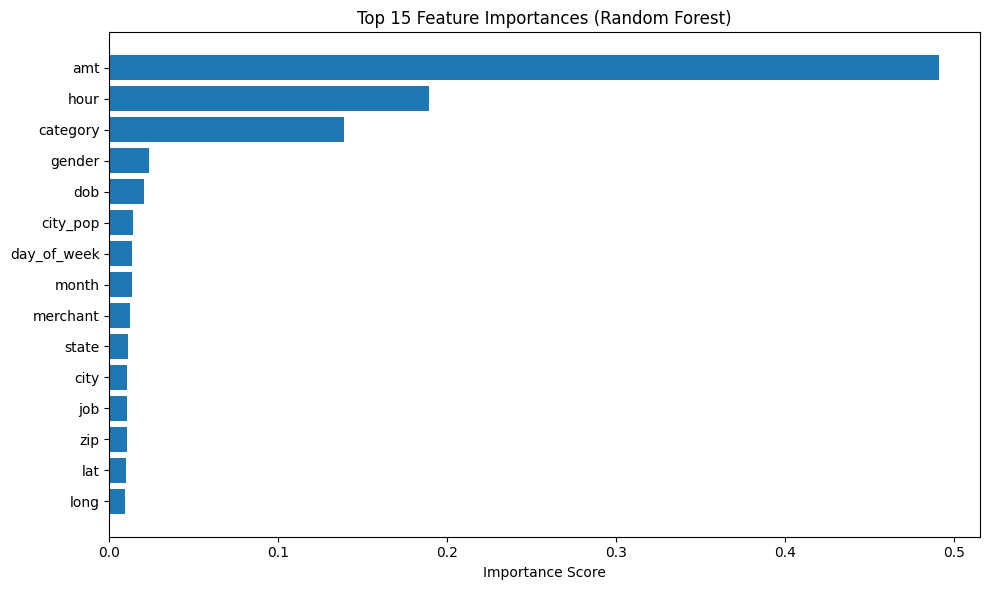

In [ ]:
# ---------------------------
# 3. Feature Importance (Global)
# ---------------------------
importances = clf.feature_importances_
feature_names = X.columns

# Plot top 15 features
sorted_idx = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx][::-1], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx][::-1])
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

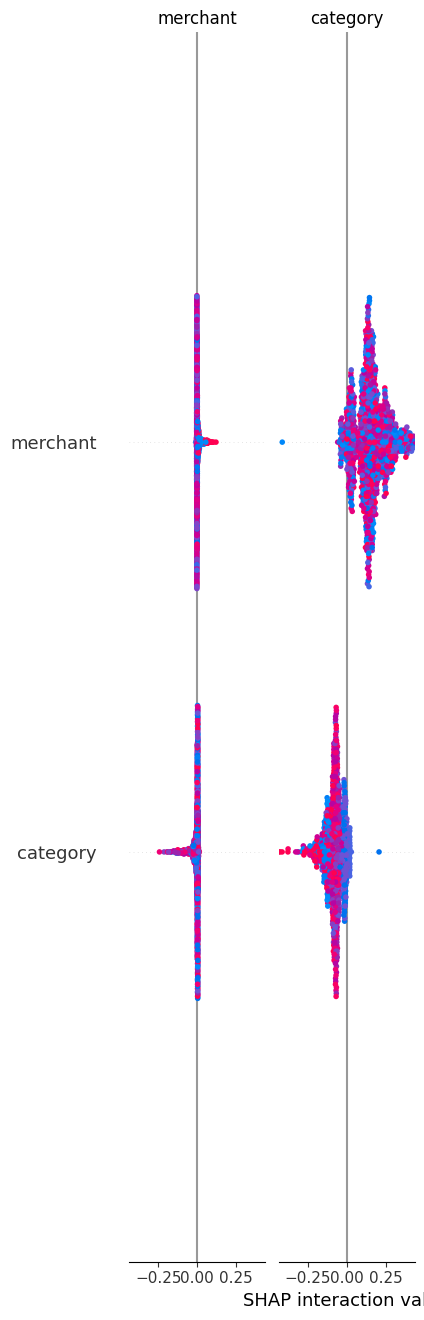

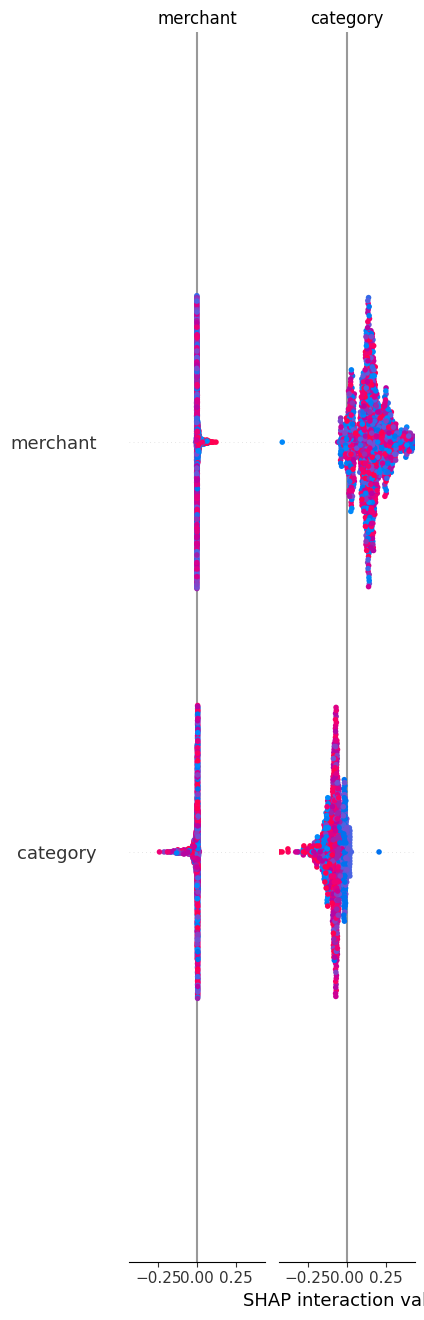

In [ ]:
# ---------------------------
# 4. SHAP Analysis (Faster via Sampling)
# ---------------------------
import shap

# Sample 1000 rows from test set
X_sample = X_test.sample(n=1000, random_state=42)

# Create SHAP explainer and compute values
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_sample)

# Handle binary classification cases correctly
if isinstance(shap_values, list):
    shap_to_plot = shap_values[1]  # Class 1 (fraud)
else:
    shap_to_plot = shap_values  # Already in correct format

# Global summary plot (bar)
shap.summary_plot(shap_to_plot, X_sample, plot_type="bar", max_display=15)

# Beeswarm plot for detailed inspection
shap.summary_plot(shap_to_plot, X_sample, max_display=15)


In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.18.0
Keras version: 3.8.0


In [ ]:
# Saving the models and scaler
import joblib

# Save models
joblib.dump(clf, "random_forest_model.pkl")
joblib.dump(iso, "isolation_forest_model.pkl")
autoencoder.save("autoencoder_model.h5")  # Keras model
joblib.dump(scaler, "scaler.pkl")

print("✅ Models and scaler saved successfully.")


✅ Models and scaler saved successfully.


In [ ]:
# Save the final feature column order
import joblib
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

In [ ]:
# Fit and save the scaler
scaler = StandardScaler()
scaler.fit(X)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']